# Customer Churn Prediction



# Importing the data

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
#import matplotlib.ticker as mtick 
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.iloc[:,9:12].head()

,OnlineSecurity,OnlineBackup,DeviceProtection
0,No,Yes,No
1,Yes,No,Yes
2,Yes,Yes,No
3,Yes,No,Yes
4,No,No,No


# Understanding the data

In [4]:
data.shape

(7043, 21)

In [5]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Data Manipulation

In [7]:
data.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
data.loc[:,['Churn','gender','Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','InternetService','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']] = data.loc[:,['Churn','gender','Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','InternetService','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']].apply(enc.fit_transform)
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [9]:
data.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,1.000000


In [10]:
datacorr = data.corr()
datacorr

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,-0.195525


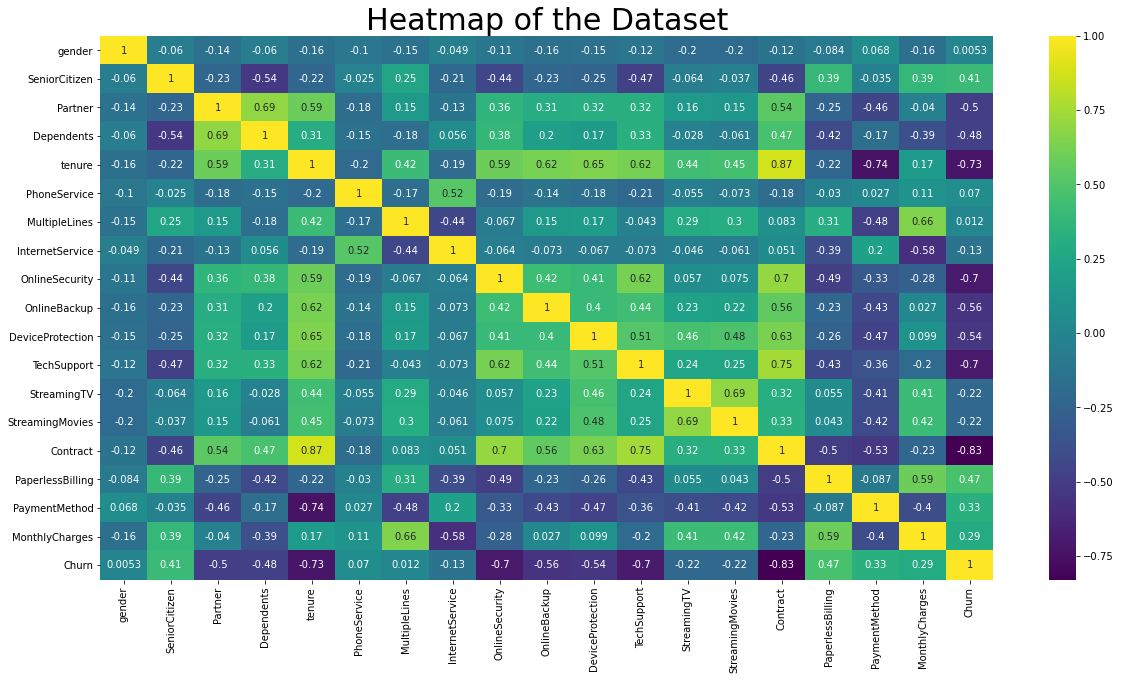

In [11]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.heatmap(datacorr.corr(), annot = True, cmap = 'viridis')
plt.title('Heatmap of the Dataset', fontsize = 30)
plt.show()

# Data Visualization

Text(0.5, 1.0, 'Percentage  of months the customer has stayed with the company')

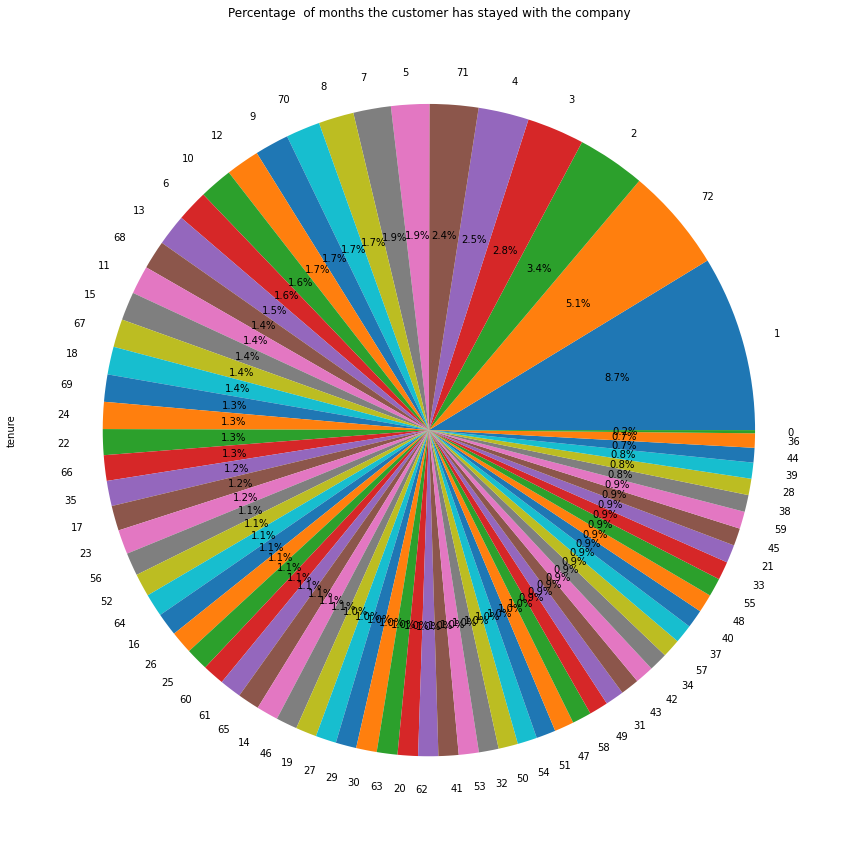

In [12]:
from matplotlib import rcParams
data1 = data['tenure'].value_counts(sort = True)
rcParams['figure.figsize'] = 15,15
data1.plot(kind='pie',autopct='%1.1f%%')
plt.title('Percentage  of months the customer has stayed with the company')


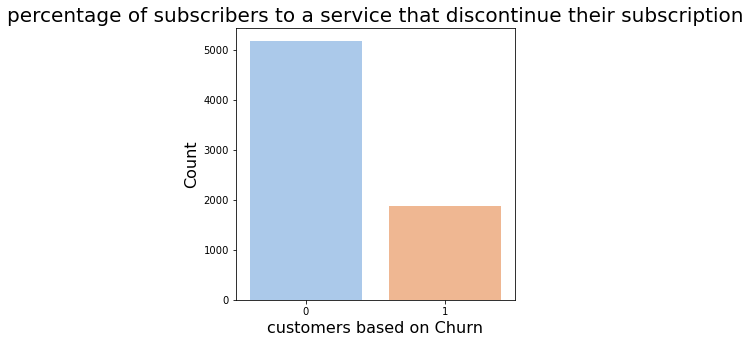

In [13]:
plt.figure(figsize = (5,5))
ax = sns.countplot(x = 'Churn', data = data, palette = 'pastel')
ax.set_title(label = 'percentage of subscribers to a service that discontinue their subscription', fontsize = 20)
ax.set_xlabel(xlabel = 'customers based on Churn', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
plt.show()

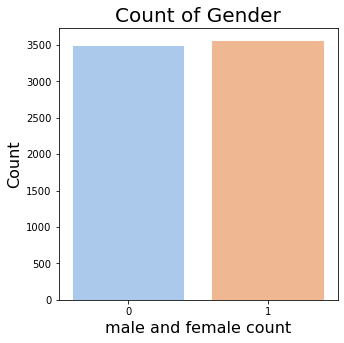

In [14]:
plt.figure(figsize = (5,5))
ax = sns.countplot(x = 'gender', data = data, palette = 'pastel')
ax.set_title(label = 'Count of Gender', fontsize = 20)
ax.set_xlabel(xlabel = 'male and female count', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
plt.show()

In [15]:
data2 = pd.read_csv('Churn.csv')
data2.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


<AxesSubplot:xlabel='OnlineBackup', ylabel='Churn'>

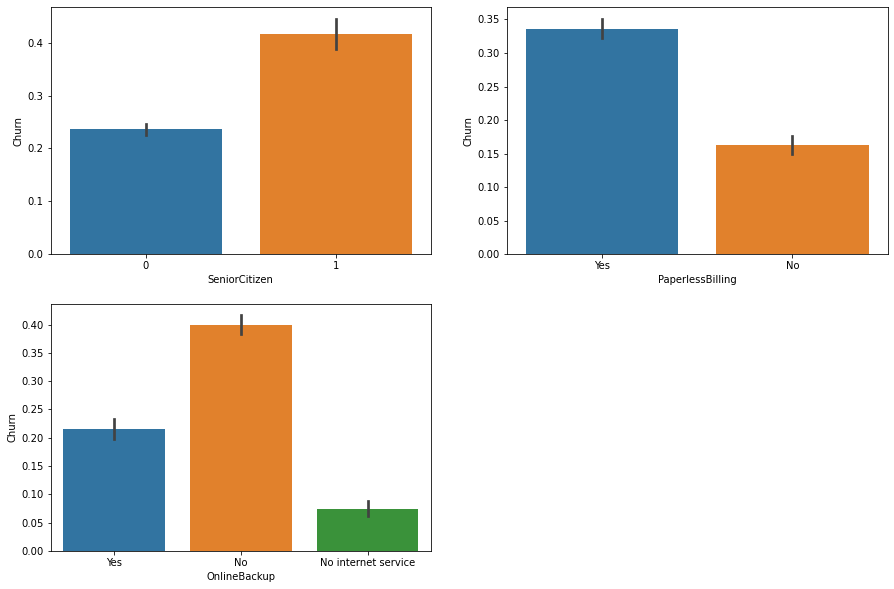

In [16]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot(data2['SeniorCitizen'],data['Churn'])
plt.subplot(2,2,2)
sns.barplot(data2['PaperlessBilling'],data['Churn'])
plt.subplot(2,2,3)
sns.barplot(data2['OnlineBackup'],data['Churn'])

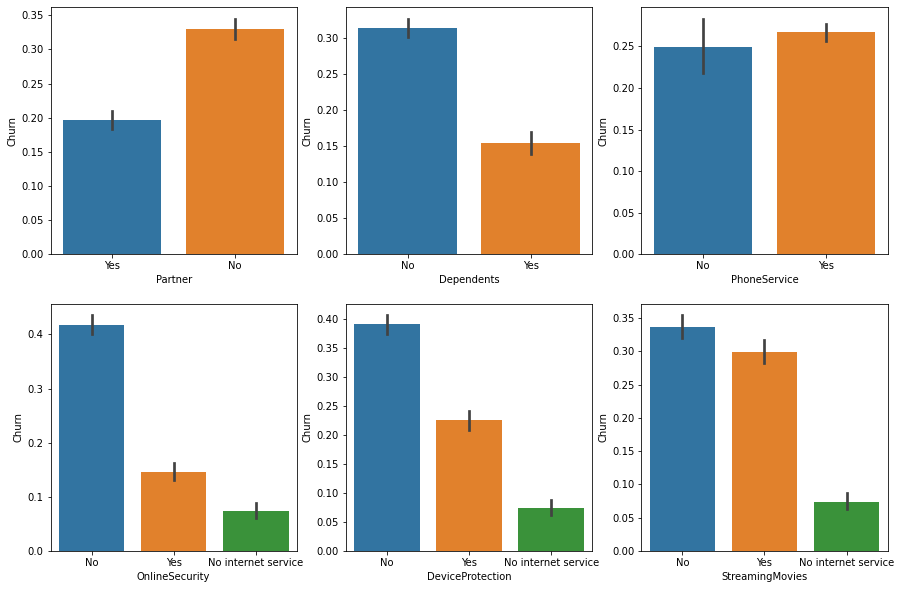

In [17]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.barplot(data2['Partner'],data['Churn'])
plt.subplot(2,3,2)
sns.barplot(data2['Dependents'],data['Churn'])
plt.subplot(2,3,3)
sns.barplot(data2['PhoneService'],data['Churn'])
plt.subplot(2,3,4)
sns.barplot(data2['OnlineSecurity'],data['Churn'])
plt.subplot(2,3,5)
sns.barplot(data2['DeviceProtection'],data['Churn'])
plt.subplot(2,3,6)
sns.barplot(data2['StreamingMovies'],data['Churn'])
plt.show()

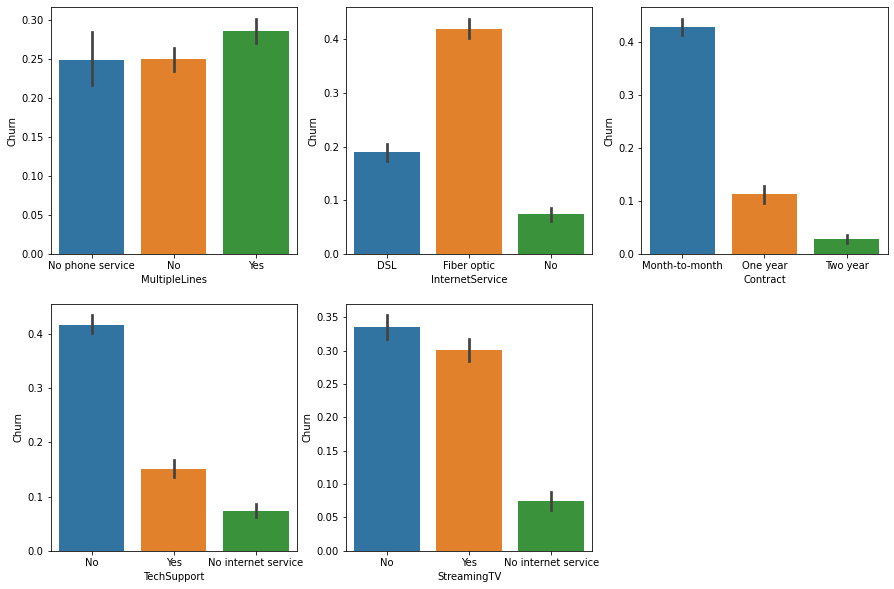

In [18]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.barplot(data2['MultipleLines'],data['Churn'])
plt.subplot(2,3,2)
sns.barplot(data2['InternetService'],data['Churn'])
plt.subplot(2,3,3)
sns.barplot(data2['Contract'],data['Churn'])
plt.subplot(2,3,4)
sns.barplot(data2['TechSupport'],data['Churn'])
plt.subplot(2,3,5)
sns.barplot(data2['StreamingTV'],data['Churn'])
plt.show()

<AxesSubplot:xlabel='PaymentMethod', ylabel='Churn'>

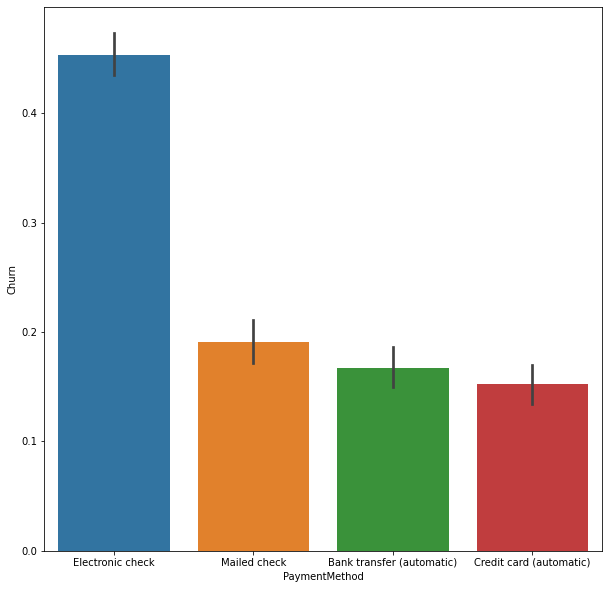

In [19]:
plt.figure(figsize=(10,10))
sns.barplot(data2['PaymentMethod'],data['Churn'])

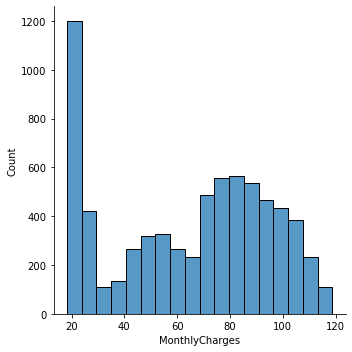

In [20]:
sns.displot(data2, x="MonthlyCharges")

# Implement Machine Learning Models

## Feature selection

In [21]:
data.drop(['customerID','TotalCharges'],inplace=True,axis=1)

In [22]:
print(data.head(5))

   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 

In [23]:
X=data.iloc[:,:-1]
y=data.Churn 
print(X.head(3))

   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
2                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  
0                 1              2           29.85  
1                 0              3 

# LogisticRegression

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,r2_score
from collections import Counter

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=14)

In [26]:
X_train.shape

(4930, 18)

In [27]:
X_test.shape

(2113, 18)

In [28]:
model = LogisticRegression()

In [29]:
model.fit(X_train,y_train)
y_predict= model.predict(X_test)
accuracy_score(y_test,y_predict)

0.8130619971604354

### Model Evaluation

In [30]:
y_test

6775    0
368     0
5822    0
2080    0
350     0
       ..
4780    0
4411    0
6012    1
1156    0
2326    0
Name: Churn, Length: 2113, dtype: int32

In [31]:
y_predict

array([0, 0, 0, ..., 1, 0, 0])

In [32]:
print(Counter(y_test))
pd.crosstab(y_test,y_predict)

Counter({0: 1578, 1: 535})


col_0,0,1
Churn,,
0,1413,165
1,230,305


# Support Vector Machine

In [33]:
from sklearn.svm import SVC
from sklearn.metrics import precision_score , recall_score ,classification_report

In [34]:
model=SVC(C=5,gamma=0.5,kernel='rbf')

In [35]:
model.fit(X_train,y_train)
y_predict= model.predict(X_test)
accuracy_score(y_test,y_predict)

0.783719829626124

In [36]:
print(Counter(y_test))
print(classification_report(y_test,y_predict))

Counter({0: 1578, 1: 535})
              precision    recall  f1-score   support

           0       0.79      0.96      0.87      1578
           1       0.69      0.27      0.38       535

    accuracy                           0.78      2113
   macro avg       0.74      0.61      0.63      2113
weighted avg       0.77      0.78      0.75      2113



# XGBoost

In [37]:
from xgboost import XGBClassifier

In [38]:
model=XGBClassifier(learning_rate=0.7,n_estimators=250,random_state=14)


In [39]:
model.fit(X_train,y_train)
y_predict= model.predict(X_test)
accuracy_score(y_test,y_predict)

[13:34:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.7695220066256507

In [40]:
pd.crosstab(y_test,y_predict)

col_0,0,1
Churn,,
0,1349,229
1,258,277


In [41]:
print(Counter(y_test))
print(classification_report(y_test,y_predict))

Counter({0: 1578, 1: 535})
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1578
           1       0.55      0.52      0.53       535

    accuracy                           0.77      2113
   macro avg       0.69      0.69      0.69      2113
weighted avg       0.77      0.77      0.77      2113



# RandomForestClassifier

In [42]:
from sklearn.ensemble import RandomForestClassifier  

In [43]:
model=RandomForestClassifier(n_estimators=100,random_state=10)
model.fit(X_train,y_train)
y_predict= model.predict(X_test)
accuracy_score(y_test,y_predict)

0.7950780880265026

In [44]:
print(Counter(y_test))
pd.crosstab(y_test,y_predict)

Counter({0: 1578, 1: 535})


col_0,0,1
Churn,,
0,1405,173
1,260,275


In [45]:
print(Counter(y_test))
print(classification_report(y_test,y_predict))

Counter({0: 1578, 1: 535})
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1578
           1       0.61      0.51      0.56       535

    accuracy                           0.80      2113
   macro avg       0.73      0.70      0.71      2113
weighted avg       0.79      0.80      0.79      2113



In [46]:
import pickle
pickle.dump(model, open('survivemodel.pkl','wb'))

# Final Conclusions